In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasets/Iris.csv')


Importamos as bibliotecas necessárias para análise e modelagem, e carregamos o dataset Iris. O dataset é transformado em um DataFrame do Pandas

In [2]:
#importando as bilbiotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

#carregando o dataset
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target



as variáveis (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) são todas variáveis numéricas contínuas - já possui a variável target (Species) representada como números inteiros (0, 1, 2)

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
#exibindo as primeiras linhas do dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
print(df['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


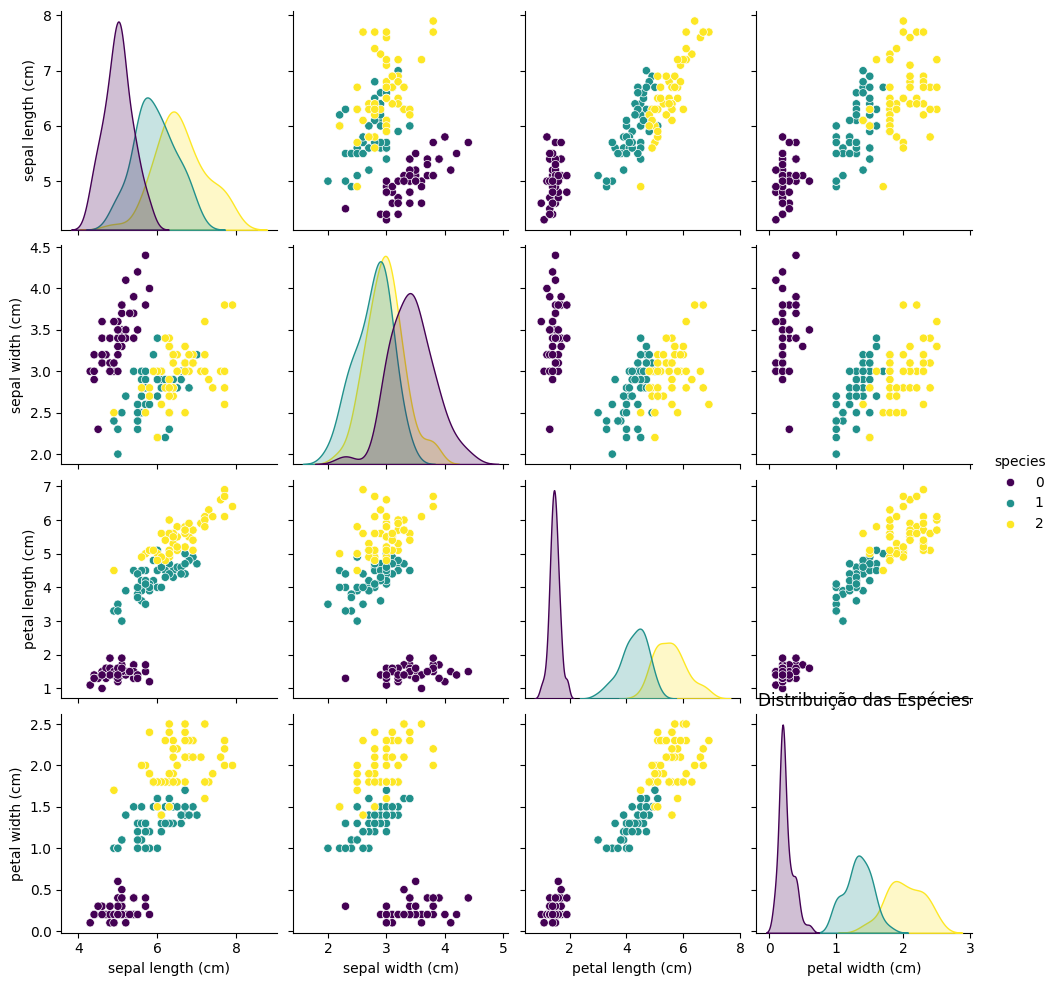

In [ ]:
sns.pairplot(df, hue='species', palette='viridis')
plt.title('Distribuição das Espécies')
plt.show()

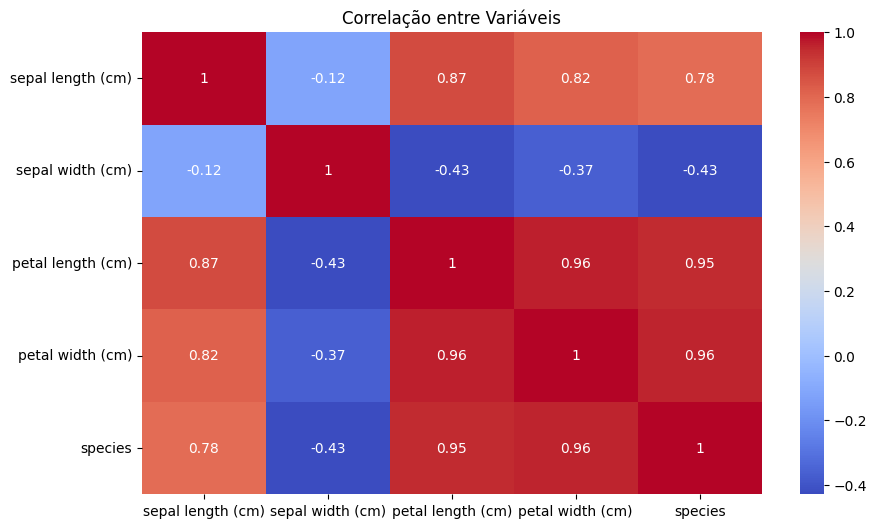

In [ ]:
#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

 **Preparação dos Dados**:Nesta etapa, separamos o dataset em variáveis preditoras (X) e a variável alvo (y). Em seguida, dividimos os dados em conjuntos de treinamento e teste.

In [ ]:
#separando as variáveis preditoras e a variável alvo
X = df[iris.feature_names]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



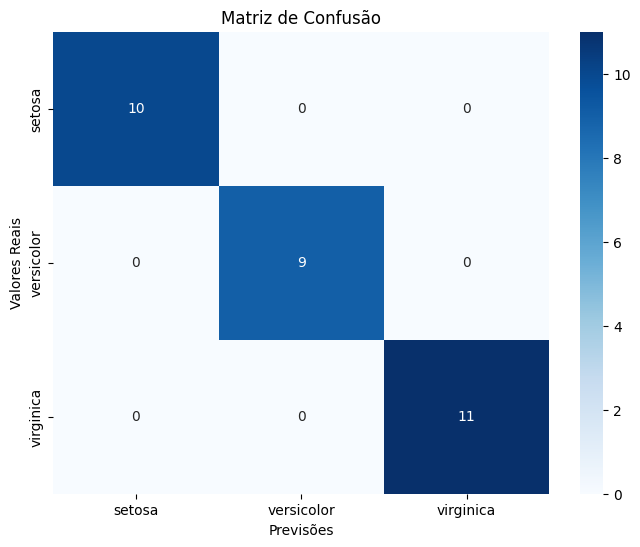

In [ ]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

#matriz de confusao
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


In [ ]:
#lista de valores para K a serem testados
k_values = range(1, 21)

mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    mean_scores.append(np.mean(scores))
    print(f'Para k = {k}, Acurácia média = {np.mean(scores):.4f}')

#encontrar o valor de K que proporciona a melhor média de pontuação
best_k = k_values[np.argmax(mean_scores)]
print(f'O melhor valor de K é {best_k} com uma acurácia média de {np.max(mean_scores):.4f}')


Para k = 1, Acurácia média = 0.9600
Para k = 2, Acurácia média = 0.9533
Para k = 3, Acurácia média = 0.9667
Para k = 4, Acurácia média = 0.9667
Para k = 5, Acurácia média = 0.9667
Para k = 6, Acurácia média = 0.9667
Para k = 7, Acurácia média = 0.9667
Para k = 8, Acurácia média = 0.9667
Para k = 9, Acurácia média = 0.9733
Para k = 10, Acurácia média = 0.9667
Para k = 11, Acurácia média = 0.9667
Para k = 12, Acurácia média = 0.9733
Para k = 13, Acurácia média = 0.9800
Para k = 14, Acurácia média = 0.9733
Para k = 15, Acurácia média = 0.9733
Para k = 16, Acurácia média = 0.9733
Para k = 17, Acurácia média = 0.9733
Para k = 18, Acurácia média = 0.9800
Para k = 19, Acurácia média = 0.9733
Para k = 20, Acurácia média = 0.9800
O melhor valor de K é 13 com uma acurácia média de 0.9800


Nesse projeto, exploramos o dataset Iris, preparamos os dados e treinamos um modelo K-Nearest Neighbors (KNN). Realizamos a avalicaçao do modelo e os resultados mostraram que o modelo é eficaz na classificação das espécies de Iris.